In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path ='/content/drive/MyDrive/DS/world-happiness-report-2021.csv'


df = pd.read_csv(path)

In [ ]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ladder score,149.0,5.532839,1.073924e+00,2.523,4.852,5.534,6.255,7.842
Standard error of ladder score,149.0,0.058752,2.200120e-02,0.026,0.043,0.054,0.070,0.173
upperwhisker,149.0,5.648007,1.054330e+00,2.596,4.991,5.625,6.344,7.904
lowerwhisker,149.0,5.417631,1.094879e+00,2.449,4.706,5.413,6.128,7.780
Logged GDP per capita,149.0,9.432208,1.158601e+00,6.635,8.541,9.569,10.421,11.647
Social support,149.0,0.814745,1.148890e-01,0.463,0.750,0.832,0.905,0.983
Healthy life expectancy,149.0,64.992799,6.762043e+00,48.478,59.802,66.603,69.600,76.953
Freedom to make life choices,149.0,0.791597,1.133318e-01,0.382,0.718,0.804,0.877,0.970
Generosity,149.0,-0.015134,1.506567e-01,-0.288,-0.126,-0.036,0.079,0.542
Perceptions of corruption,149.0,0.727450,1.792263e-01,0.082,0.667,0.781,0.845,0.939


In [ ]:
import seaborn as sns

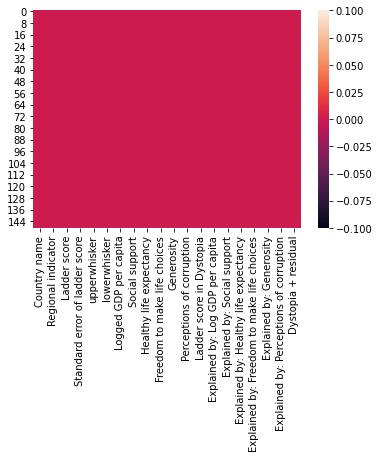

In [ ]:
sns.heatmap(df.isna());

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def countPlotByKey(key=''):
  regional= df[key]

  data= regional.value_counts()

  names = np.array(data.axes[0])
  count = np.array(data.array)

  plt.figure(figsize=(40,10))
  plt.bar(names,count);

def countPlotUniqueKey():

  data= df.nunique()

  names = np.array(data.axes[0])
  count = np.array(data.array)

  plt.figure(figsize=(40,10))
  plt.bar(names,count);

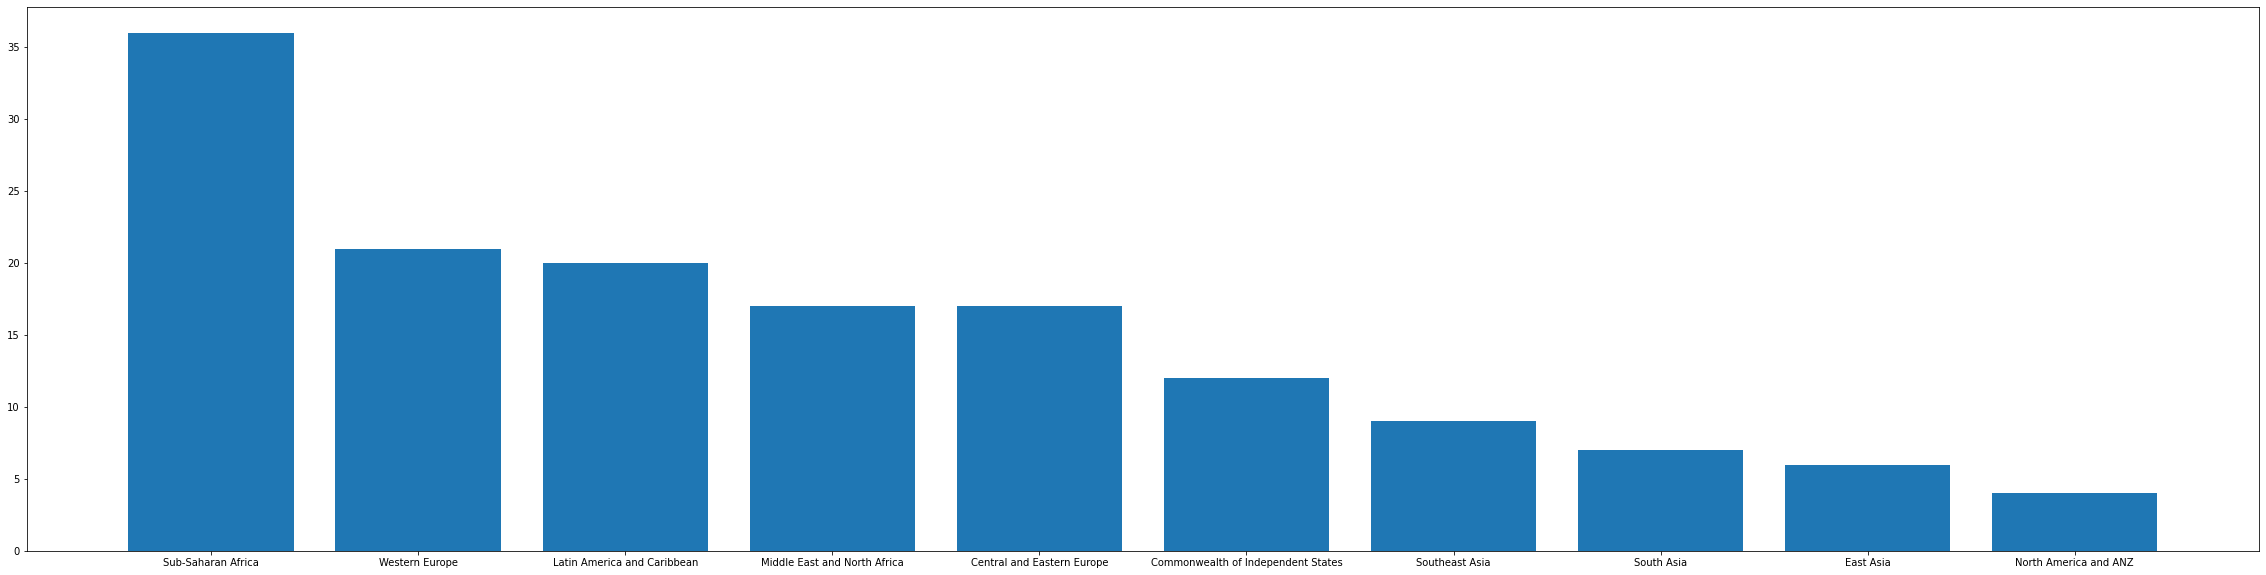

In [ ]:
countPlotByKey('Regional indicator')

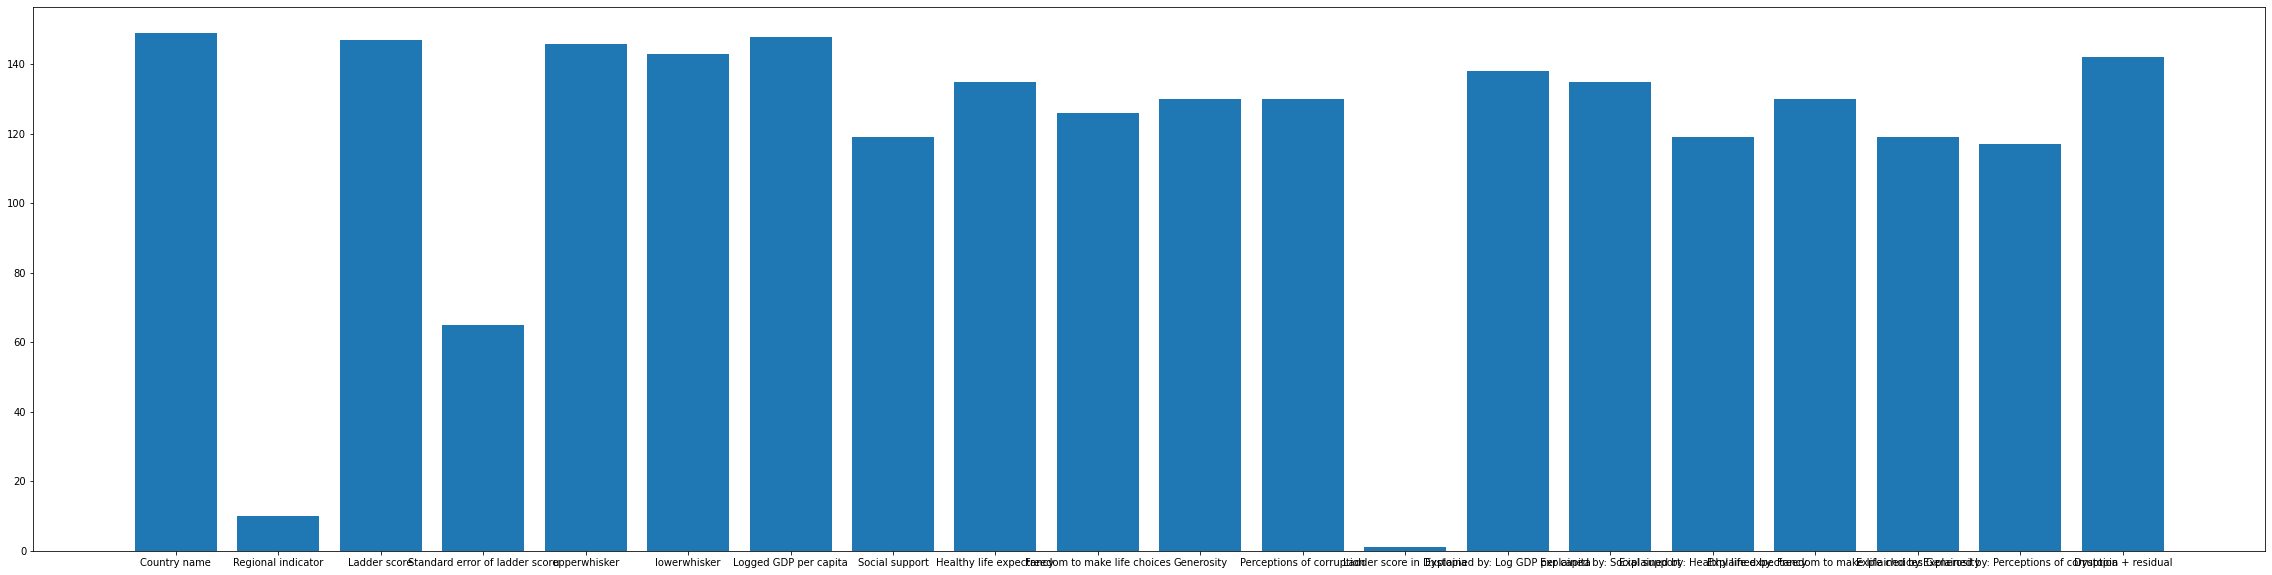

In [ ]:
countPlotUniqueKey()

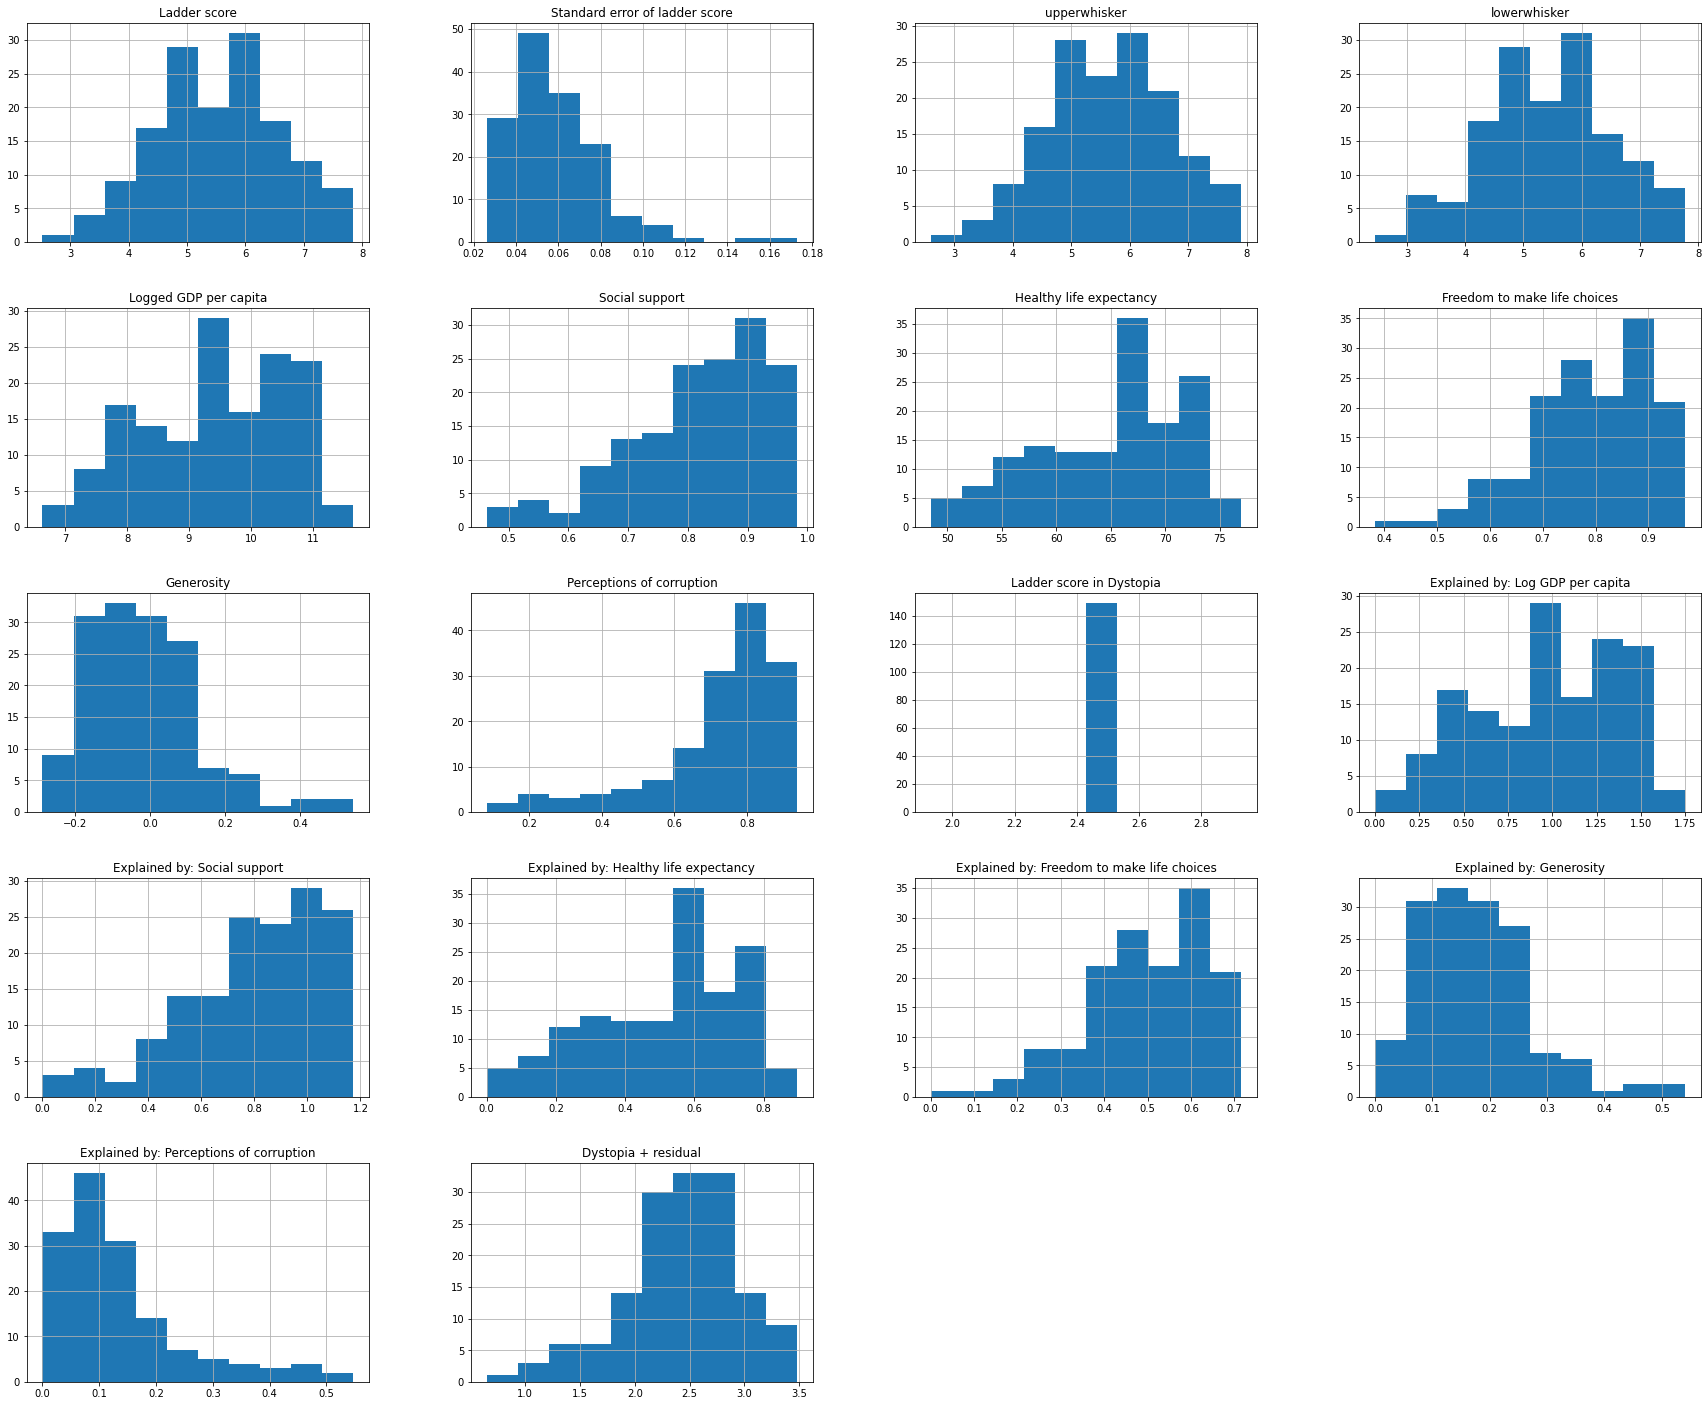

In [ ]:
df.hist(figsize=(30,25));

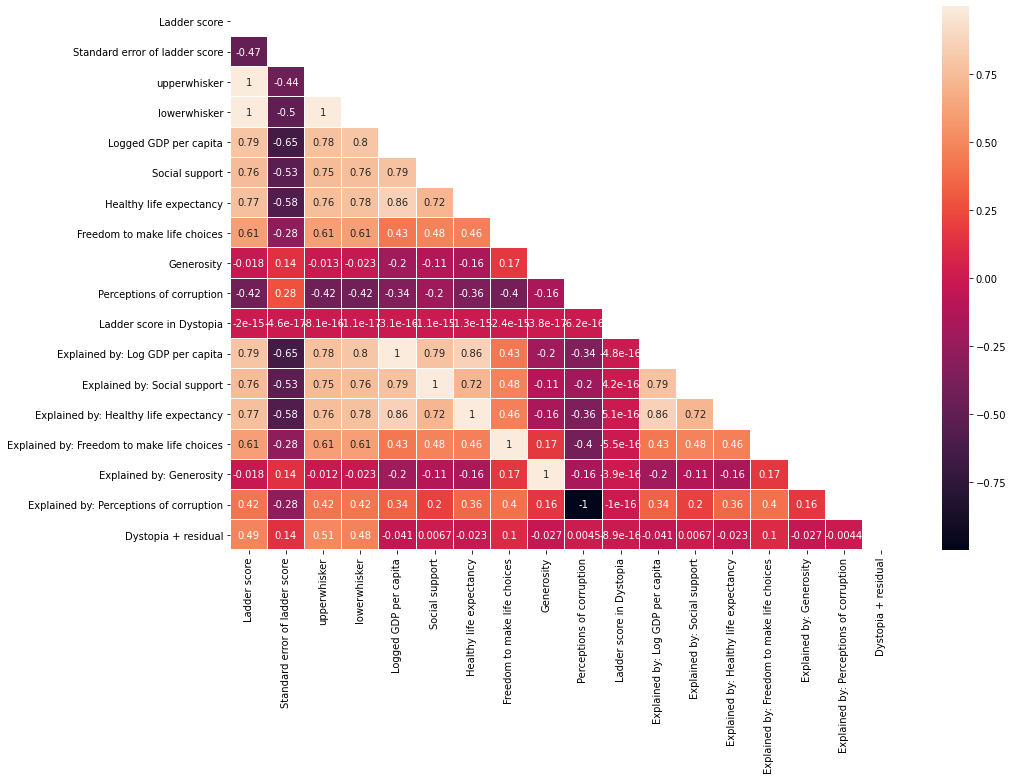

In [ ]:
plt.figure(figsize=(15,10))

sub = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True,linewidths=.15, mask=sub)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


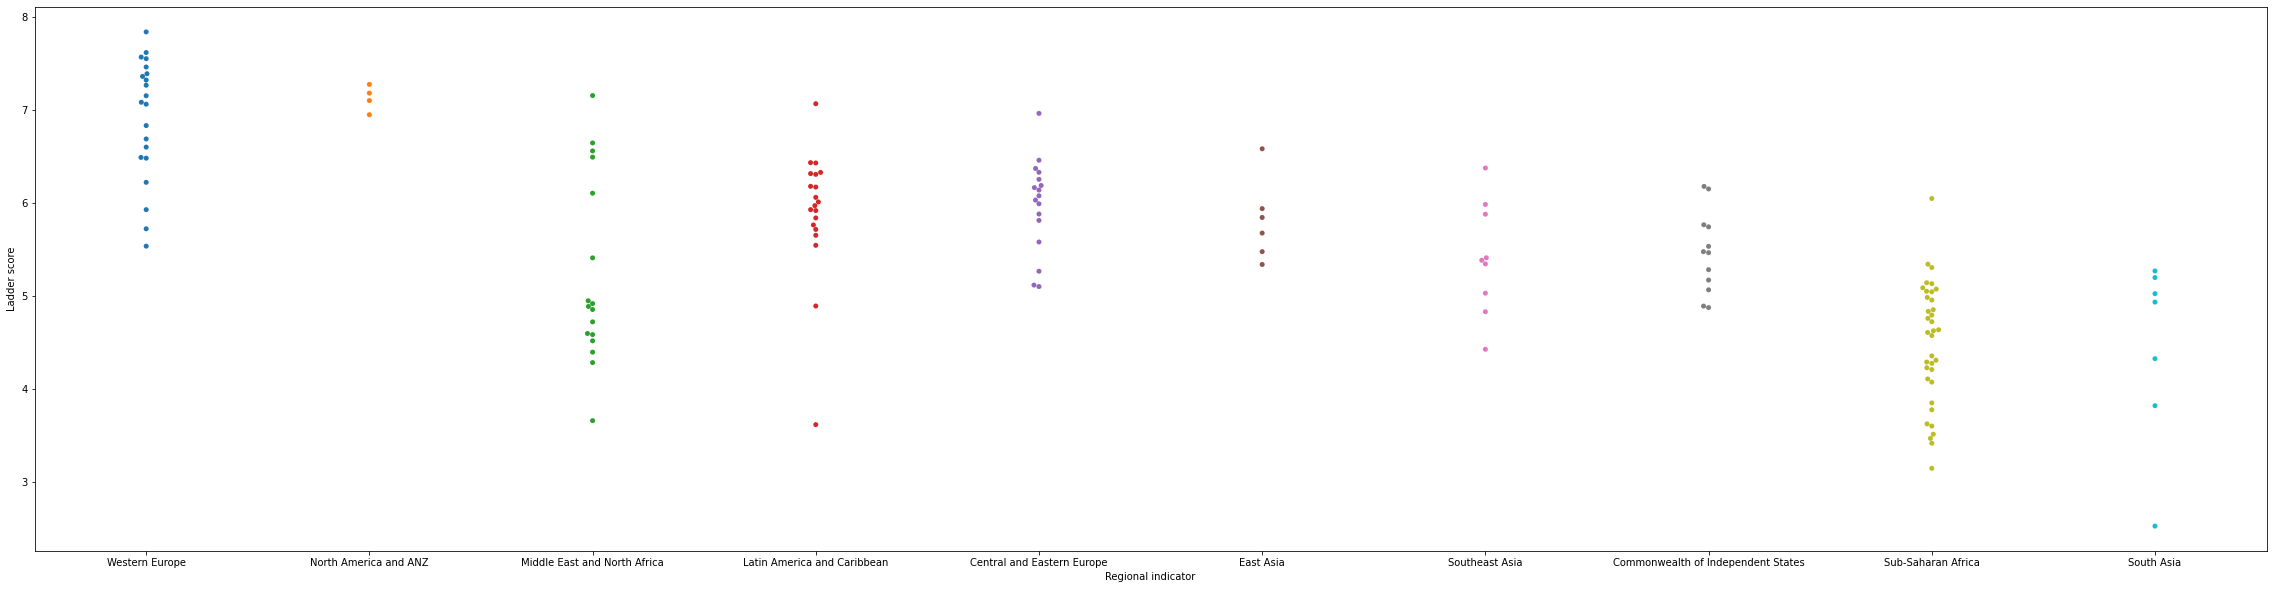

In [ ]:
plt.figure(figsize=(40,10))
sns.swarmplot(df['Regional indicator'],df['Ladder score']);

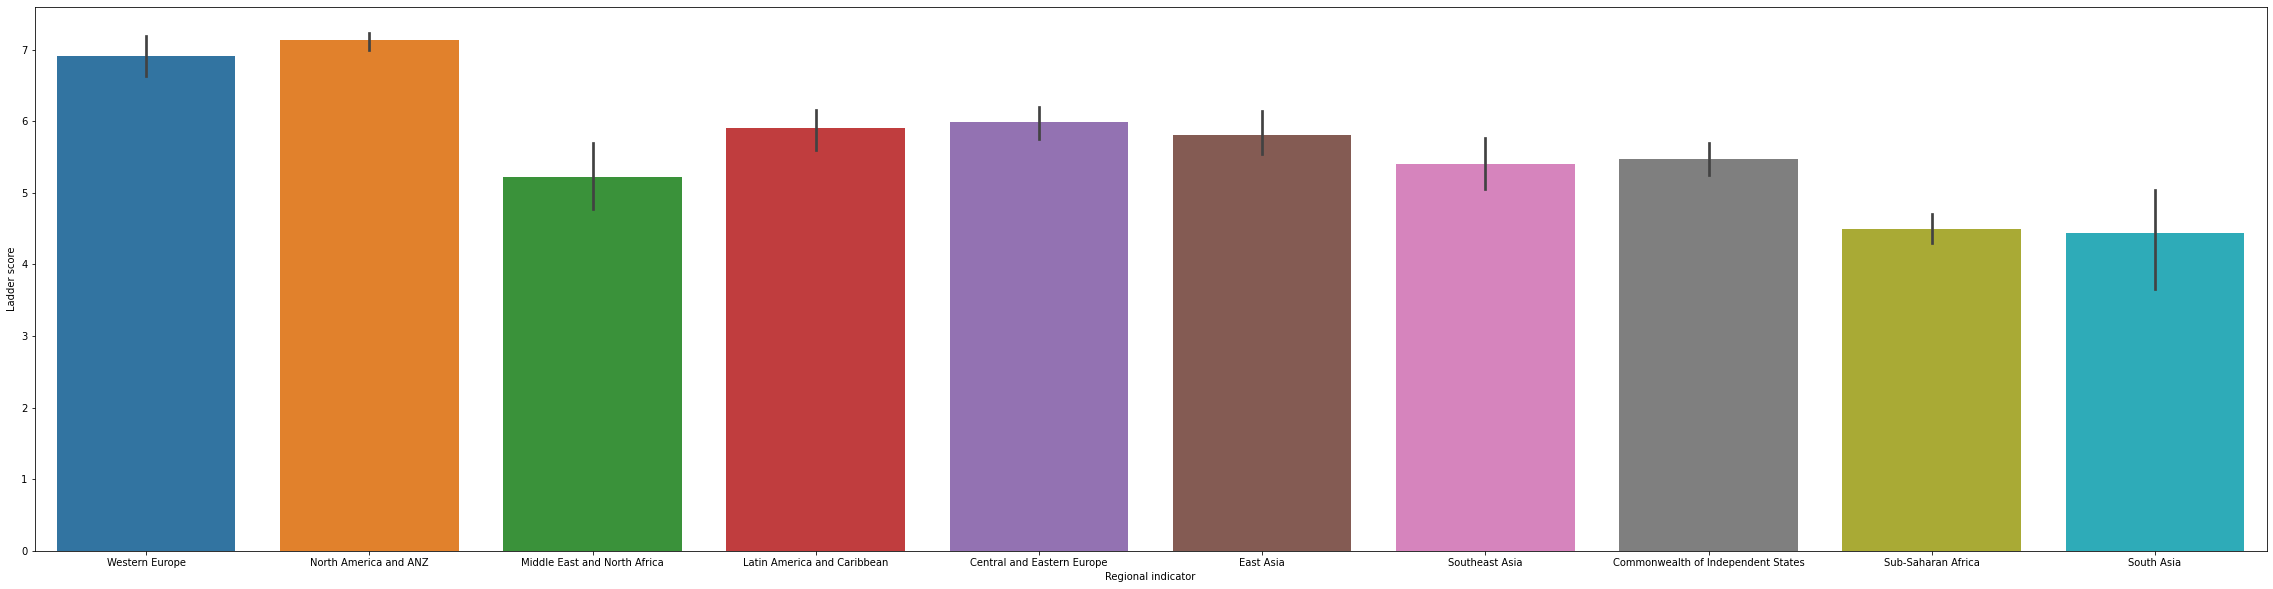

In [ ]:
plt.figure(figsize=(40,10))

sns.barplot(x=df['Regional indicator'],y=df['Ladder score']);

In [ ]:
sub_df = [
          'Ladder score','Logged GDP per capita',
          'Social support', 'Healthy life expectancy',
          'Freedom to make life choices', 
          'Generosity','Perceptions of corruption',
          'Ladder score in Dystopia'
          ]

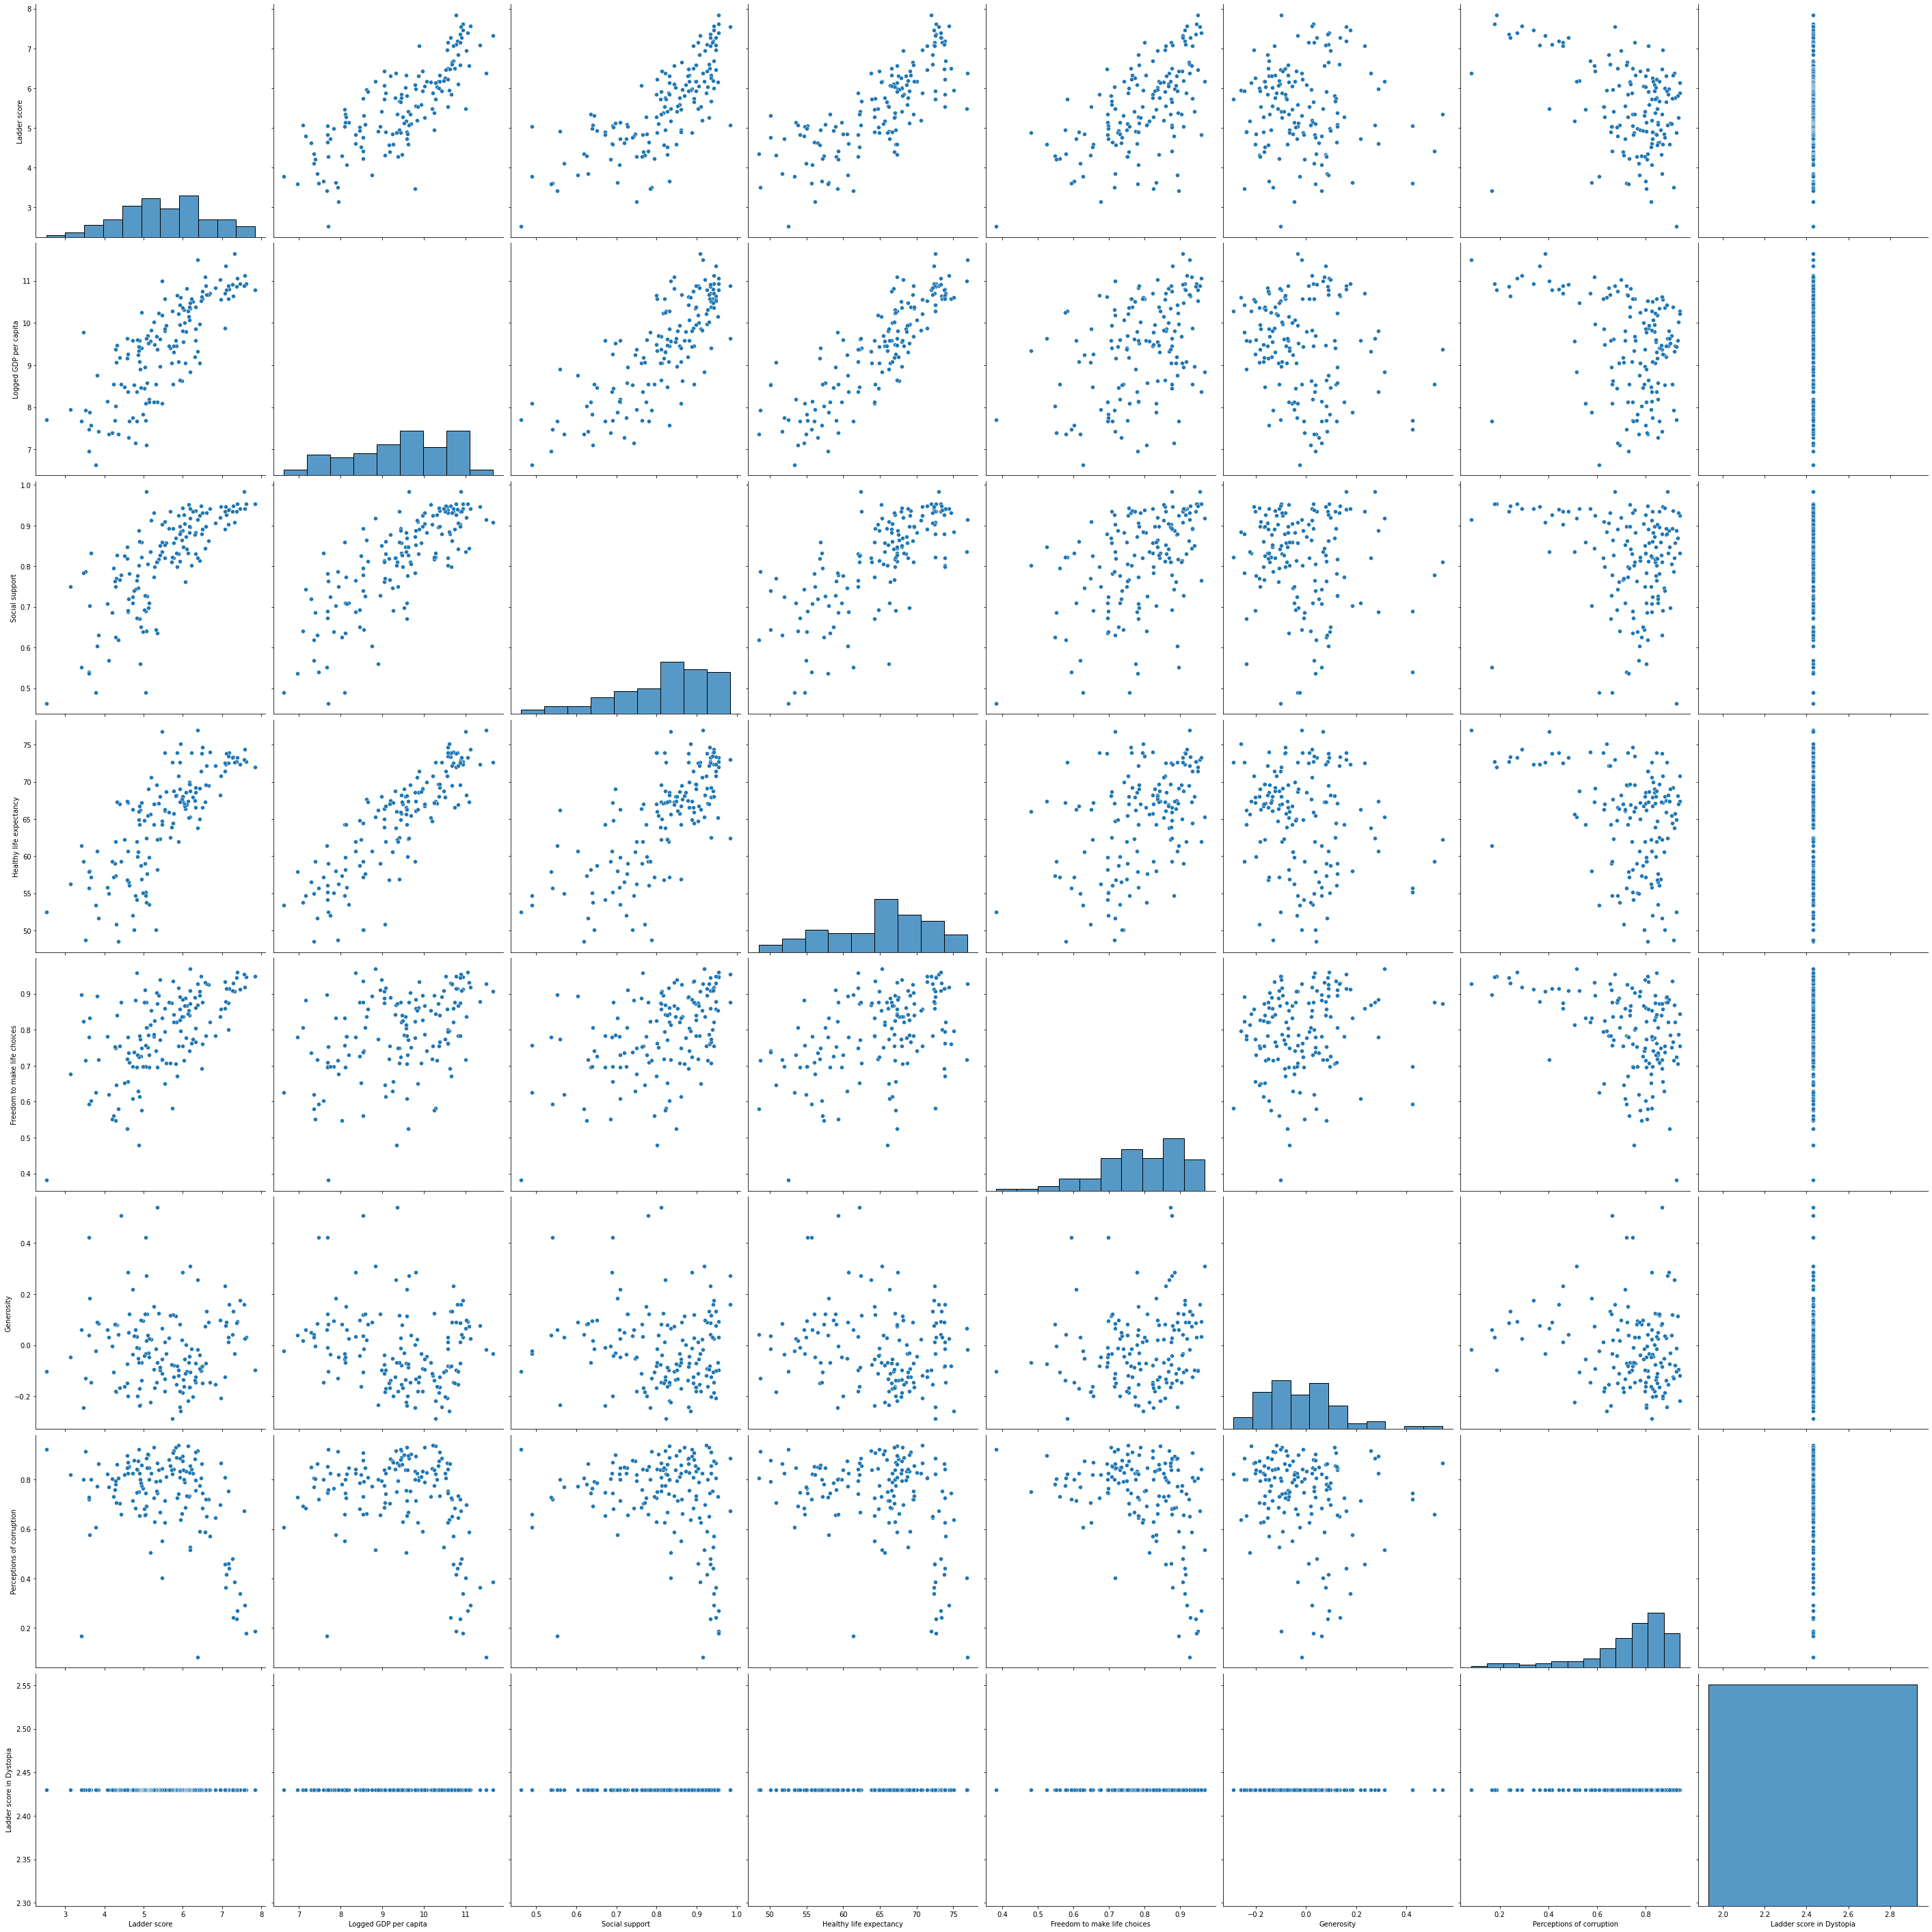

In [ ]:
sns.pairplot(df[sub_df],height=5);

In [ ]:
trivariate = [
              'Logged GDP per capita',
              'Social support',
              'Healthy life expectancy',
              'Freedom to make life choices',
              'Perceptions of corruption'
              ]

exp = df[['Country name','Regional indicator','Logged GDP per capita','Social support','Ladder score','Healthy life expectancy','Freedom to make life choices','Perceptions of corruption']].sort_values('Ladder score', ascending = True)

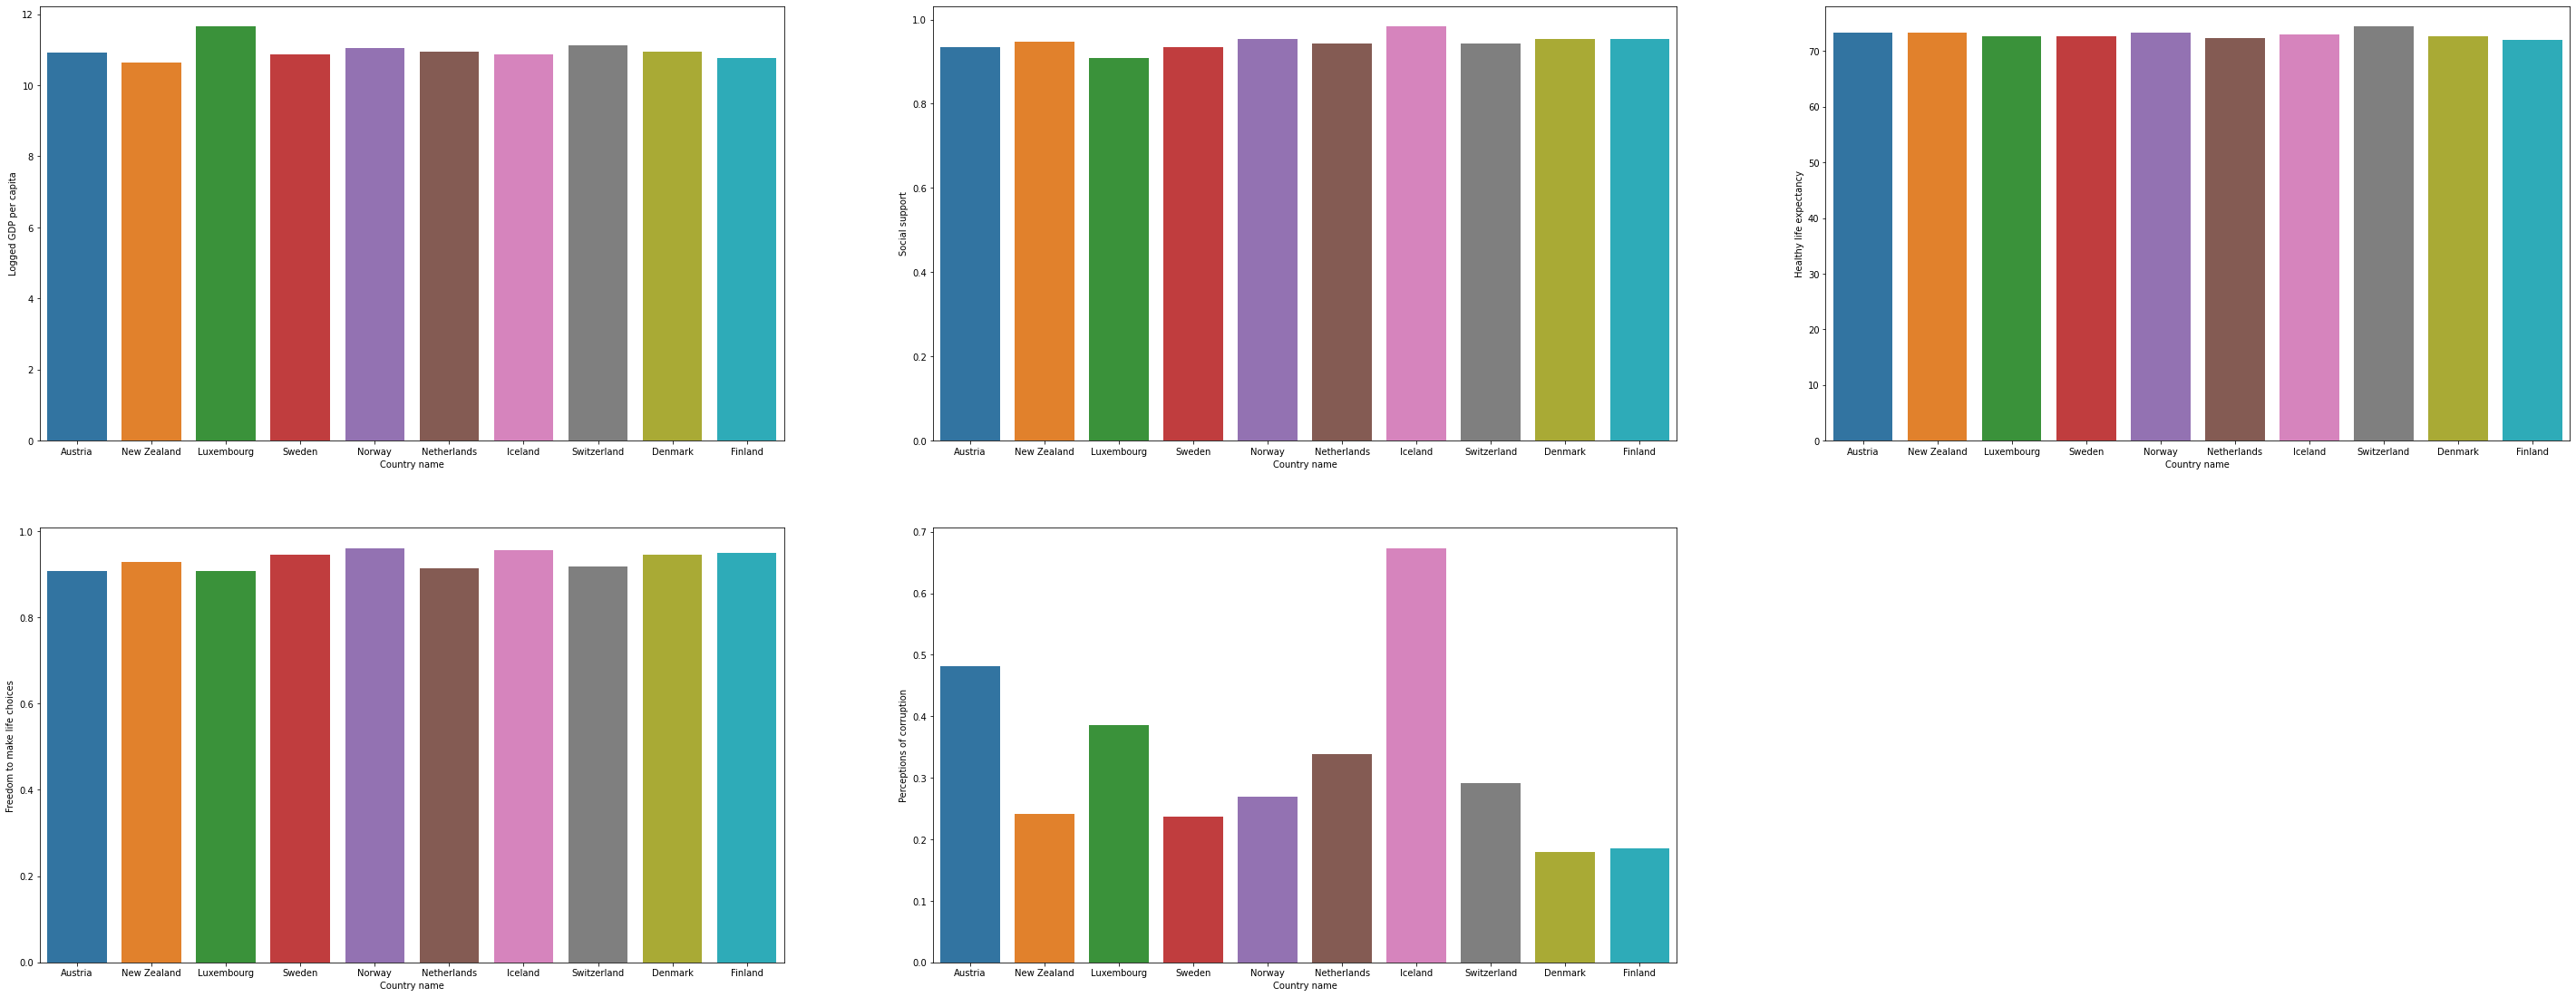

In [ ]:
i=1
plt.figure(figsize=(50,30))
for name in trivariate:
  plt.subplot(3,3,i)
  sns.barplot(x=exp['Country name'][139:],y=exp[name][139:])
  i+=1